<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/flip_mind_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model of mind to be implemented in a Robot

In [182]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

I = moment of inertia, a = depth of ptential well, w = angular velocity of oscillationg mind, f = is a fraction to modify the potential well, b = damping factor, c = environmental force

for N=8, 5 options are generated in the potential well

k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelvin

T= Social Temperature    # actual value 300K (at room temp)

Therefore, kT=1.38x3=4.14

KE=0.5*I*w2 kinetic energy

U = internal energy

In [183]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=3.5
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=math.sqrt(a)

Energy loss due to frictional force:

if b= damping factor, then average energy loss = 1/2 x b x omega_square

Energy gain/loss due to external force, c:

c x cos (theta_max - theta)

Asssuming angular velocity is not varying much

In [184]:
# Mind Potential Equation biased because of  various brands in the market
omega_square=I/a
t = np.arange(-np.pi/2,np.pi/2,0.05)   # start,stop,step
t_max=np.pi/2
H0 = U + a*(1-np.cos(t))
H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t))
H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square
H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square + c*np.cos(t)

#In the figure
frictional force is dissipative in nature, it reduces the free energy level

external force will add energy to the system, it boosts free energy level for +ve force reduced flipping probability or vice-versa

We are using -ve energy, for demonstration

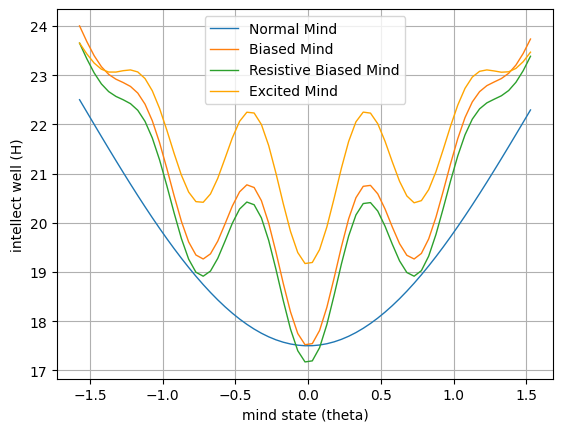

In [185]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.plot(t, H0, t, H1, t, H2, t, H3, 'orange', linewidth = 1)
plt.xlabel('mind state (theta)')
plt.ylabel('intellect well (H)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'Excited Mind'])
plt.grid(True)

Reduce b so that system ocsillates properly, top we have used b=3.5 just to show the graphs properly.

In [186]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.1
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=math.sqrt(a)

In [187]:
def test_osc(x,t):
    return [x[1], -a*x[0] -b*x[1]]

In [188]:
def coupled_osc(x, t):
      return  [x[1], -a*np.sin(x[0]) -b*x[1] -f*a*np.sin(x[0])*np.cos(N*x[0]) - f*a*np.cos(x[0])*np.sin(N*x[0])]

In [189]:
def flip_osc(x, t):
      return  [x[1], -a*np.sin(x[0]) -b*x[1] -f*a*np.sin(x[0])*np.cos(N*x[0]) - f*a*np.cos(x[0])*np.sin(N*x[0])- c*np.sin(x[0])]

# Coupled Oscillator OUTPUT

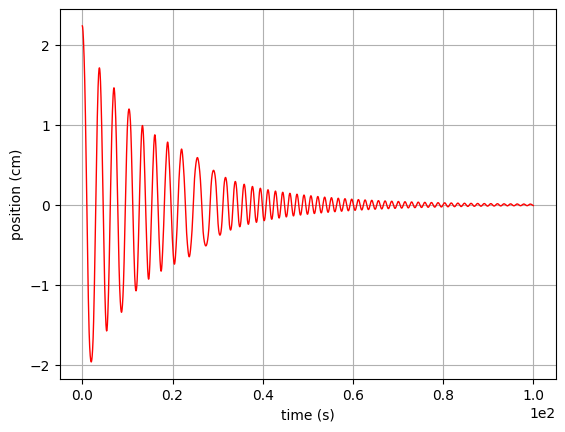

In [190]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 10000
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[Amp,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    solution = odeint(coupled_osc, init_value, my_time)
    init_value =solution[1,0],solution[1,1]
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    #print (i*my_time[1], solution[1,0], solution[1,1])

#print(posi_array)
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array, posi_array, 'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

# Flip Oscillator OUTPUT

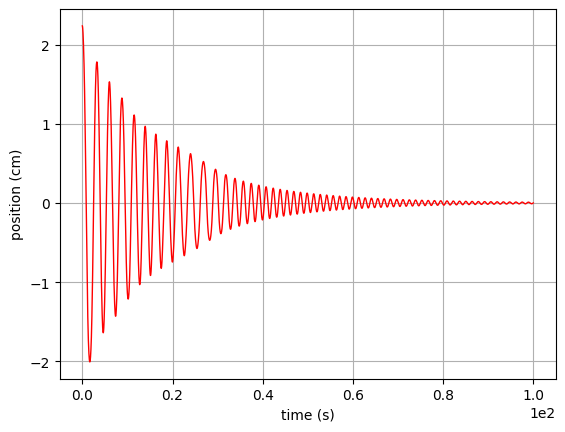

In [191]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 10000
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[Amp,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    solution = odeint(flip_osc, init_value, my_time)
    init_value =solution[1,0],solution[1,1]
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    #print (i*my_time[1], solution[1,0], solution[1,1])

#print(posi_array)
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array, posi_array, 'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

In [197]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 7000

# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta =Amp
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    Hi= U + a*(1-np.cos(theta))+ f*a*(1-np.cos(theta)*np.cos(N*theta))- b*omega
    if Hi>20:
        #theta =Amp
        #omega =0
        #init_value =[theta, omega]
        solution = odeint(flip_osc, init_value, my_time)
    else:
        solution = odeint(coupled_osc, init_value, my_time)
    init_value =solution[1,0],solution[1,1]
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    # Now calculate the free energy Hi
    theta=posi_array[i]
    omega=velo_array[i]
    #print (Hi,theta)



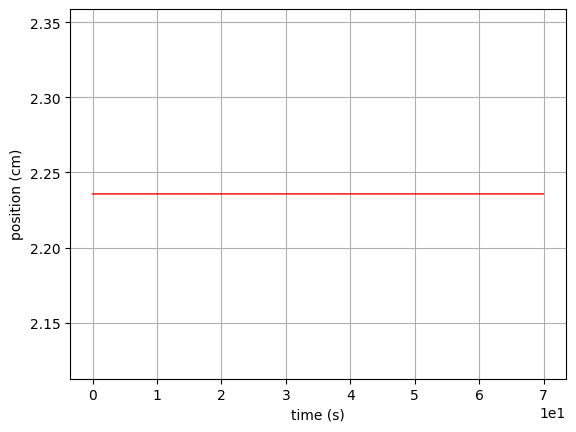

In [198]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array, posi_array, 'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

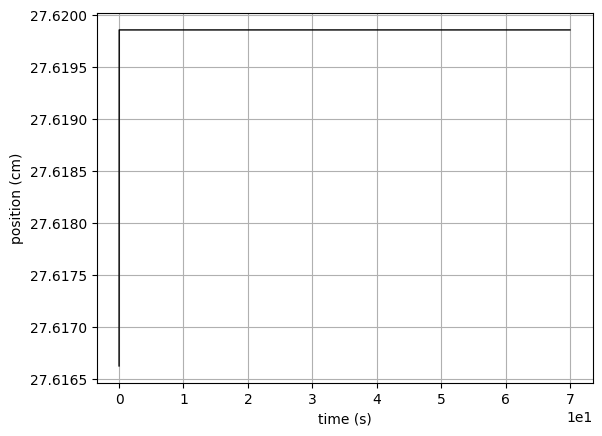

In [196]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array, enrg_array, 'black', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)